Importing Required Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the data from the csv file as a dataframe

In [5]:
df=pd.read_csv('data/StudentsPerformance.csv')

First five records of the dataset

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [7]:
df.shape

(1000, 8)

The dataset consists 1000 rows 8 columns

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

In [9]:
df.duplicated().sum()

0

There are no duplicate values also

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The mean of all three scores is similar 66-68
The min value for math is quite different compared to reading and writing
All standard deviations are close between 14.6-15.19

In [13]:
print(df['gender'].unique())
print(df['race/ethnicity'].unique())
print(df['lunch'].unique())
print(df['parental level of education'].unique())
print(df['test preparation course'].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
['standard' 'free/reduced']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['none' 'completed']


In [14]:
## DIVIDING INTO NUMERICAL AND CATEGORICAL FEATURES
numeric_features=[features for features in df.columns if df[features].dtype!='O']
categorical_features=[features for features in df.columns if df[features].dtype=='O']

print(f"{len(numeric_features)} numerical features : {numeric_features}")
print(f"{len(categorical_features)} categorical features : {categorical_features}")


3 numerical features : ['math score', 'reading score', 'writing score']
5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Lets add columns for total score and average

In [15]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

In [17]:
print(f'NUMBER OF STUDENTS WITH FULL MARKS IN READING : {reading_full}')
print(f'NUMBER OF STUDENTS WITH FULL MARKS IN READING : {writing_full}')
print(f'NUMBER OF STUDENTS WITH FULL MARKS IN READING : {math_full}')


NUMBER OF STUDENTS WITH FULL MARKS IN READING : 17
NUMBER OF STUDENTS WITH FULL MARKS IN READING : 14
NUMBER OF STUDENTS WITH FULL MARKS IN READING : 7


In [18]:
reading_full=df[df['reading score']<=20]['average'].count()
writing_full=df[df['writing score']<=20]['average'].count()
math_full=df[df['math score']<=20]['average'].count()

In [19]:
print(f'NUMBER OF STUDENTS WITH FULL MARKS IN READING : {reading_full}')
print(f'NUMBER OF STUDENTS WITH FULL MARKS IN READING : {writing_full}')
print(f'NUMBER OF STUDENTS WITH FULL MARKS IN READING : {math_full}')

NUMBER OF STUDENTS WITH FULL MARKS IN READING : 1
NUMBER OF STUDENTS WITH FULL MARKS IN READING : 3
NUMBER OF STUDENTS WITH FULL MARKS IN READING : 4


Exploring Data (Visualization)
Visualize average score distribution to make conclusion
Histogram
Kernel Distribution Function (KDE)

Insights:
We see that students performed worst in Math and good in Reading

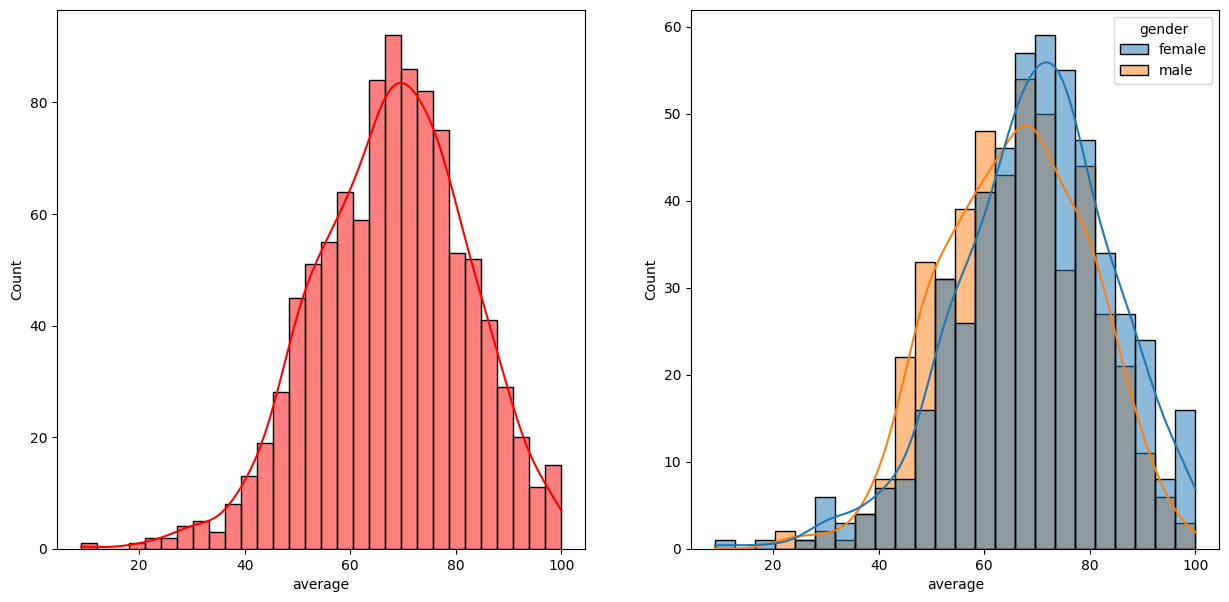

In [22]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


Females do better than males in the exams

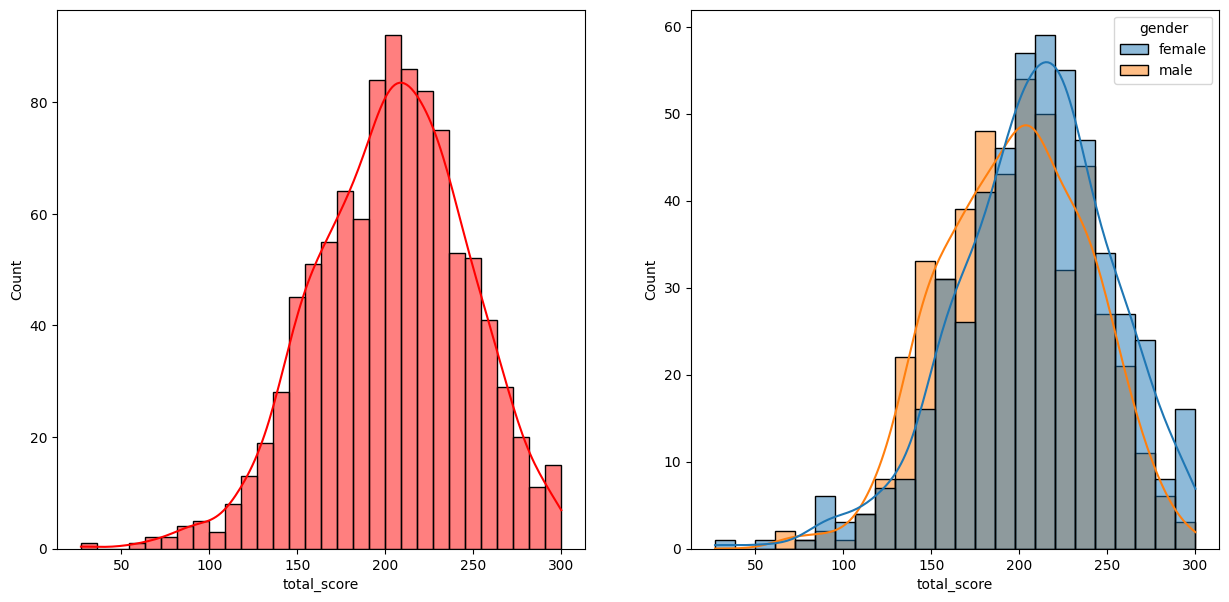

In [23]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

With respect to both total score and average it is shown that females do bettert at studies

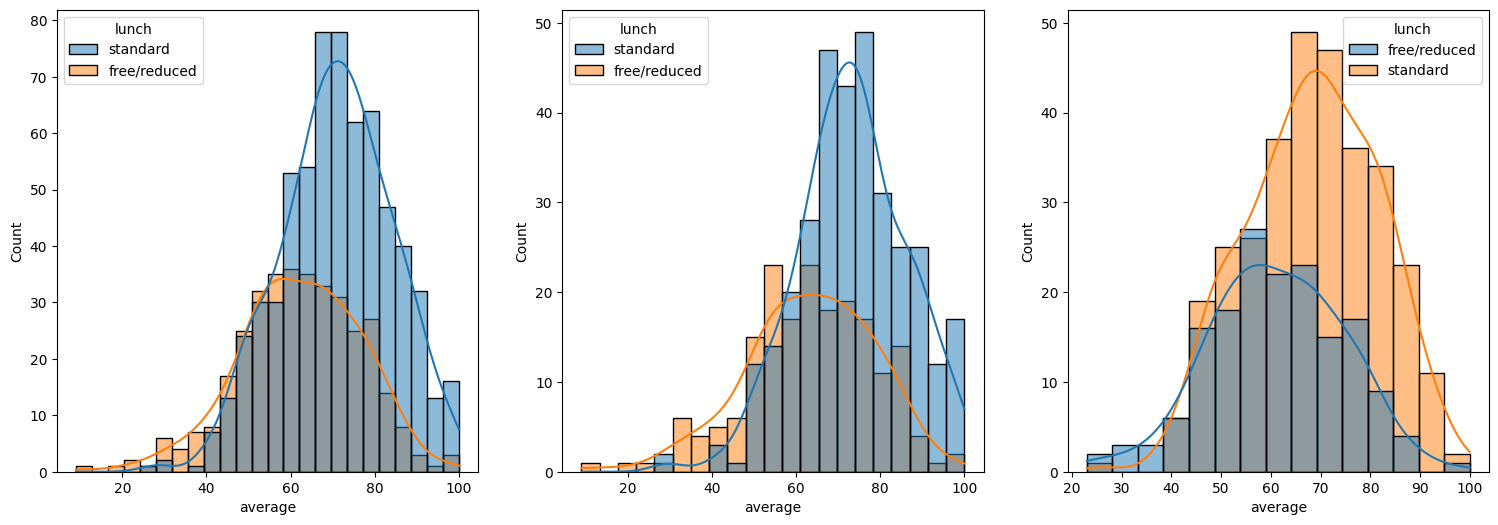

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(1,4,2)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.show()

It can be understood from the above plots that when given standard lunch 
The students performed a lot better irrespective of their gender